<a href="https://colab.research.google.com/github/viviannemedeiros/estatisticaDescritiva/blob/master/Exercicio2_Adultos_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto - Estatística Descritiva - Exercício 02 - 25/01/2020

**Prof:** Tsang Ing Ren

**Grupo:** Alexandra Vitorio

Vivianne Medeiros

**Objetivo:** Predizer quando renda excede $50000 dólares anuais baseados nos dados do censo.

**Fonte dos dados:** https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

A fonte de dados é a mesma utilizada no exercício anterior, contendo detalhes de seu conteúdo no Exercício 1.

# Naive Bayes

**Teorema de Bayes**

$
P(B_i | A) = \frac{P(A | B_i) P(B_i)}{\sum^k_{j=1}P(A|B_j)P(B_j)}
$



$
P(\mbox{class} | X) = P(X | \mbox{class})P(\mbox{class})
$

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Leitura dos dados
adultos=pd.read_csv("https://raw.githubusercontent.com/viviannemedeiros/estatisticaDescritiva/master/adult.data", 
                      encoding = "ISO-8859-1", sep=",", header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                                                                            'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                                                                            'capital-gain', 'capital-loss', 'hours-per-week', 
                                                                            'native-country', 'class'])

print(adultos.head())
print(adultos.info())

   age          workclass  fnlwgt  ... hours-per-week  native-country   class
0   39          State-gov   77516  ...             40   United-States   <=50K
1   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
2   38            Private  215646  ...             40   United-States   <=50K
3   53            Private  234721  ...             40   United-States   <=50K
4   28            Private  338409  ...             40            Cuba   <=50K

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
cap

In [3]:
# Excluindo colunas que não nos interessa
adultos = adultos.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'],axis=1)
adultos.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class
0,39,77516,13,2174,0,40,<=50K
1,50,83311,13,0,0,13,<=50K
2,38,215646,9,0,0,40,<=50K
3,53,234721,7,0,0,40,<=50K
4,28,338409,13,0,0,40,<=50K


In [4]:
adultos.dtypes

age                int64
fnlwgt             int64
education-num      int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
class             object
dtype: object

In [0]:
# Setando a coluna class como categórica
adultos['class'] = adultos['class'].astype('category')

In [6]:
# Criando nova coluna Class
adultos['Class'] = 0
# Efetuando uma classificação numérica 
adultos.loc[(adultos['class'] == ' <=50K'),'Class'] = '0'
adultos.loc[(adultos['class'] == ' >50K'),'Class'] = '1'
adultos = adultos.drop('class',axis=1)
# Tratando a nova coluna de classificação como numérica 
adultos['Class'] = adultos['Class'].astype('int32')
adultos.dtypes

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
Class             int32
dtype: object

In [7]:
adultos.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Class
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


Separate by class

In [0]:
def separate_by_class(dataset):
  classes = np.unique(dataset['Class'])

  separated = []
  for cl in classes:
    separated.append(dataset[dataset['Class'] == cl])

  return separated

# Separando o dataset nas classes salariais (<=50K, >50K)
separated = separate_by_class(adultos)

In [9]:
print(separated)

[       age  fnlwgt  education-num  ...  capital-loss  hours-per-week  Class
0       39   77516             13  ...             0              40      0
1       50   83311             13  ...             0              13      0
2       38  215646              9  ...             0              40      0
3       53  234721              7  ...             0              40      0
4       28  338409             13  ...             0              40      0
...    ...     ...            ...  ...           ...             ...    ...
32553   32  116138             14  ...             0              11      0
32555   22  310152             10  ...             0              40      0
32556   27  257302             12  ...             0              38      0
32558   58  151910              9  ...             0              40      0
32559   22  201490              9  ...             0              20      0

[24720 rows x 7 columns],        age  fnlwgt  education-num  ...  capital-loss  hours-

Plot dataset

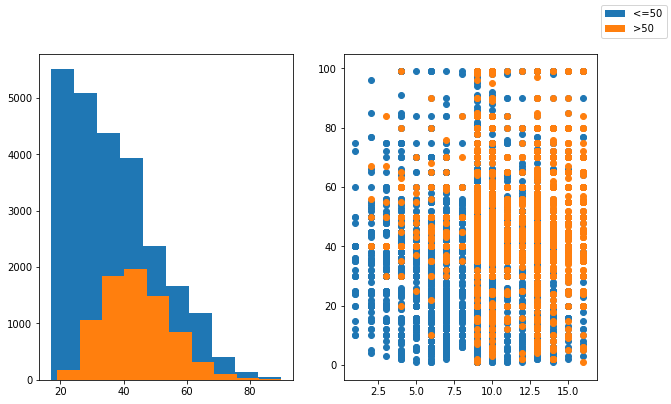

In [10]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0].hist(s['age']) # Histograma exibindo a classe de salários de acordo com a idade
  ax[1].scatter(s['education-num'], s['hours-per-week']) # Gráfico exibindo classe de salários de acordo com a educação e quantidade de horas trabalhadas por semana
fig.legend(['<=50', '>50'])

In [11]:
adultos.dtypes

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
Class             int32
dtype: object

Summarize data

Calculate the mean, stdev and count for each column in a dataset

In [12]:
def summarize_dataset(dataset, eliminate_last=True):
  if eliminate_last:
    columns = dataset.columns[:-1]
  else:
    columns = dataset.columns
  summaries = [(np.mean(dataset[column]), np.std(dataset[column]), len(dataset[column])) for column in columns]
  del(summaries[-1])
  return summaries

# Calculando a média, o desvio padrão e a quantidade de elementos de cada coluna do dataset
summaries = summarize_dataset(adultos,True)

print(summaries)

[(38.58164675532078, 13.640223092304081, 32561), (189778.36651208502, 105548.3568808909, 32561), (10.0806793403151, 2.5726808256012395, 32561), (1077.6488437087312, 7385.178676946586, 32561), (87.303829734959, 402.9540308275458, 32561)]


In [13]:
adultos.head(100)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Class
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
95,29,115585,10,0,0,50,0
96,48,191277,16,0,1902,60,1
97,37,202683,10,0,0,48,1
98,48,171095,12,0,0,40,0


Summarize data by class

In [14]:
def summarize_by_class(dataset):
  separated = separate_by_class(dataset)
  summaries = dict()
  for s in separated:
    class_value = np.array(s['Class'])
    rows = s[s.columns]
    summaries[class_value[0]] = summarize_dataset(rows, eliminate_last=False)
  return summaries

# Para cada classe, calcula a média, o desvio padrão e a quantidade de elementos de cada coluna do dataset
summaries_by_class = summarize_by_class(adultos)
print(summaries_by_class)

{0: [(36.78373786407767, 14.019804910115214, 24720), (190340.8651699029, 106480.11740527781, 24720), (9.595064724919094, 2.4360975169965515, 24720), (148.75246763754046, 963.1198261947594, 24720), (53.14292071197411, 310.74948351900656, 24720), (38.840210355987054, 12.318745468730741, 24720)], 1: [(44.24984058155847, 10.518356927661575, 7841), (188005.0, 102535.23644379714, 7841), (11.611656676444332, 2.3849765344197147, 7841), (4006.142456319347, 14569.449806813547, 7841), (195.00153041703865, 595.4496000874675, 7841), (45.473026399693914, 11.012268639552124, 7841)]}


Gaussian probability

$
P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{(x-\mu)}{\sigma})^2}
$

In [0]:
def calculate_probability(x, mean, stdev):
	exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

Probability distribution of Adultos

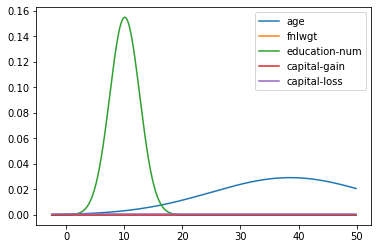

In [16]:
x = np.arange(-2.5,50,0.1)
for summ in summaries:
  y = calculate_probability(x, summ[0], summ[1])
  plt.plot(x,y)

plt.legend(['age', 'fnlwgt','education-num', 'capital-gain','capital-loss', 'hours-per-week'])
# Distribuição de probabilidade das variáveis

Probability distribution by class

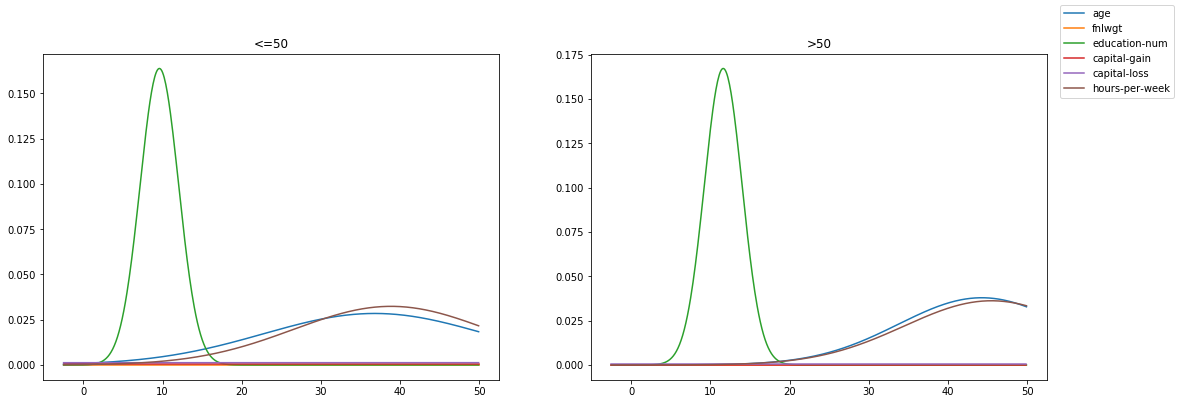

In [17]:
n_classes = len(summaries_by_class)
fig,ax = plt.subplots(1,n_classes)
fig.set_size_inches(18, h=6)

classes_name = ['<=50', '>50']
for c in range(n_classes):
  for summ in summaries_by_class[c]:
    ax[c].plot(x, calculate_probability(x, summ[0], summ[1]))
  ax[c].set_title(classes_name[c])

fig.legend(['age', 'fnlwgt','education-num', 'capital-gain','capital-loss', 'hours-per-week'])
# Distribuição de probabilidade das variáveis, de acordo com a classe salarial

Calculate accuracy percentage

In [0]:
# Cálculo do percentual de acurácia
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0



Calculate the probabilities of predicting each class for a given row

In [0]:
# Cálculo da probabilidade de predizer cada classe para uma dada linha da dados
def calculate_class_probabilities(summaries, row):
  total_rows = sum([summaries[label][0][2] for label in summaries])
  probabilities = dict()
  for class_value, class_summaries in summaries.items():
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
    for i in range(len(class_summaries)):
      mean, stdev, count = class_summaries[i]
      probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
  return probabilities


Predict the class for a given row

In [0]:
# Predizer a classe de uma dada linha
def predict(summaries, row):

	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

Split the dataset

In [0]:
# Dividir o dataset em treinamento e teste
def split(dataset):
  sz = dataset.shape[0]
  sh = np.arange(sz)
  np.random.shuffle(sh)
  vec = np.zeros((sz),dtype=bool)
  vec[sh[:int(sz*0.75)]] = True
  train = dataset.loc[vec]
  test = dataset.loc[~vec]

  return train, test


In [0]:
train,test = split(adultos)

In [0]:
# Algoritmo Naive Bayes
def naive_bayes(train, test):
  summarize = summarize_by_class(train)
  predictions = list()
  vec = np.zeros(test.shape[0], dtype=bool)
  for i in range(test.shape[0]):
    vec[i] = True
    row = np.array(test.loc[vec])[0]
    output = predict(summarize, row)
    predictions.append(output)
    vec[i] = False
  return(predictions)

In [24]:
# Realização de predições conforme o algoritmo Naive Bayes
predictions = naive_bayes(train,test)

print(predictions)
actual = np.array(test['Class'])
print(actual)

# Acurácia
print('Accuracy ', accuracy_metric(actual, predictions))

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 